# CDS503 Lab 1: Exploratory Data Analysis (Julia)


## Overview

- [DataFrames](#DataFrames)
- [Current Working Directory](#Current-Working-Directory)
- [Reading Data from CSV](#Reading-Data-from-CSV)
- [Viewing Data](#Viewing-Data)
- [Selecting Columns](#Selecting-Columns)
- [Describing Data](#Describing-Data)
- [Converting Data Type](#Converting-Data-Type)
- [Plotting Data](#Plotting-Data)

First, include all necessary Julia library packages.

In [1]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("StatsPlots")

In [2]:
using DataFrames
using CSV
using XLSX
using Plots
using Statistics    # mean()
using LinearAlgebra # dot()
using StatsPlots    # boxplot()

## DataFrames

Let us recall. There are 2 types of arrays in Julia, namely

- horizontal array, and
- vertical array (or vector)

We can perform arithmetic operations on these arrays (but we will not cover this topic here).

In [3]:
# Horizontal Array
# separated by space (' ') character
arrh = [3 4 5]

# Vertical Array (Vector)
# separated by comma (',') or semicolon (';') character.
arrv = [2; 8; 6]

println(arrh)
println(arrv)

[3 4 5]
[2, 8, 6]


Next, same as Python and R, we also have data frame in Julia. We need to specify the library when using data frame in Julia. The command is `using DataFrames`.

We create a new data frame using `DataFrame(<column_definition>)` command.

In [4]:
# DataFrame - Part 1
# Define data - a list of vertical arrays (vectors)
data = [["Alex", 10], ["Bob", 12], ["Clarke", 13]]

# Define range - here: [1, 2, 3]
idxrange = 1:length(data)

# Define separate lists for each column - using one-line for loop
listnames = [data[idxname][1] for idxname in idxrange]
listages = [data[idxage][2] for idxage in idxrange]

println(listnames)
println(listages)

["Alex", "Bob", "Clarke"]
[10, 12, 13]


In [5]:
# DataFrame - Part 2A
# Define data frame: Method 1 - Assign each list to a column name
df = DataFrame(Name = listnames, Age = listages)

show(df)

3×2 DataFrame
│ Row │ Name   │ Age   │
│     │ String │ Int64 │
├─────┼────────┼───────┤
│ 1   │ Alex   │ 10    │
│ 2   │ Bob    │ 12    │
│ 3   │ Clarke │ 13    │

In [6]:
# DataFrame - Part 2B
# Define data frame: Method 2 - Group lists and column names
# (both list must have the same length)
df = DataFrame([listnames, listages], [:Name, :Age])

# show(df)

# # df.:Name
# # df[!,:Name]
# @time df[:,:Name]
# @time df[!,:Name]

df.Name
# df[!,col]

3-element Array{String,1}:
 "Alex"
 "Bob"
 "Clarke"

Now, let us proceed to the working directory.

## Current Working Directory

Use `pwd()` function to show current working directory.

This is the directory where all your files will be saved by default.

In [7]:
currentworkdirectory = pwd()

"C:\\Users\\Darren Lee\\Documents\\GitHub\\cds503_labs\\Lab1_Exploratory_Data_Analysis"

Use `cd(<directory_name>)` function to change the working directory.

_This is for demonstration purpose. The next chunk of code is to change back the selected directory. Nothing more._

In [8]:
cd("C:\\Users\\Darren Lee")
pwd()

"C:\\Users\\Darren Lee"

In [9]:
cd(currentworkdirectory)
pwd()

"C:\\Users\\Darren Lee\\Documents\\GitHub\\cds503_labs\\Lab1_Exploratory_Data_Analysis"

## Reading Data from CSV

We are dealing with the [titanic dataset](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html). The file name is `titanic.csv`.

We have specified the Julia package library to read CSV file through `using CSV` command line.

The function is `CSV.read(<file_directory>)`

Then, we can use `show(df)` function to display the data frame `df`. (The input parameter `allcols=true` is to enable showing all columns - which is **not the case by default**.)

**Make sure the file exists in the specified _file directory_.**

In [10]:
# Read data from CSV to a data frame named df
df = CSV.read("..//data//titanic.csv")

# Display data frame
show(df, allcols=true)
# show(df)

887×8 DataFrame
│ Row │ Survived │ Pclass │ Name                                               │
│     │ Int64    │ Int64  │ String                                             │
├─────┼──────────┼────────┼────────────────────────────────────────────────────┤
│ 1   │ 0        │ 3      │ Mr. Owen Harris Braund                             │
│ 2   │ 1        │ 1      │ Mrs. John Bradley (Florence Briggs Thayer) Cumings │
│ 3   │ 1        │ 3      │ Miss. Laina Heikkinen                              │
│ 4   │ 1        │ 1      │ Mrs. Jacques Heath (Lily May Peel) Futrelle        │
│ 5   │ 0        │ 3      │ Mr. William Henry Allen                            │
│ 6   │ 0        │ 3      │ Mr. James Moran                                    │
│ 7   │ 0        │ 1      │ Mr. Timothy J McCarthy                             │
│ 8   │ 0        │ 3      │ Master. Gosta Leonard Palsson                      │
│ 9   │ 1        │ 3      │ Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   │
│ 10  │ 1   

## Viewing Data

There are functions equivalent to Python's `pandas.DataFrame.head(n)` and `pandas.DataFrame.tail(n)` in Julia's DataFrames package library, namely

- `first(df, n)` - to display first `n` rows of data frame `df`
- `last(df, n)` - to display last `n` rows of data frame `df`

In [11]:
# Display the first 3 rows
show(first(df, 3), allcols=true)

3×8 DataFrame
│ Row │ Survived │ Pclass │ Name                                               │
│     │ Int64    │ Int64  │ String                                             │
├─────┼──────────┼────────┼────────────────────────────────────────────────────┤
│ 1   │ 0        │ 3      │ Mr. Owen Harris Braund                             │
│ 2   │ 1        │ 1      │ Mrs. John Bradley (Florence Briggs Thayer) Cumings │
│ 3   │ 1        │ 3      │ Miss. Laina Heikkinen                              │

│ Row │ Sex    │ Age     │ Siblings/Spouses Aboard │ Parents/Children Aboard │
│     │ String │ Float64 │ Int64                   │ Int64                   │
├─────┼────────┼─────────┼─────────────────────────┼─────────────────────────┤
│ 1   │ male   │ 22.0    │ 1                       │ 0                       │
│ 2   │ female │ 38.0    │ 1                       │ 0                       │
│ 3   │ female │ 26.0    │ 0                       │ 0                       │

│ Row │ Fare    │
│     

In [12]:
# Display the last 3 rows
show(last(df, 3), allcols=true)

3×8 DataFrame
│ Row │ Survived │ Pclass │ Name                           │ Sex    │ Age     │
│     │ Int64    │ Int64  │ String                         │ String │ Float64 │
├─────┼──────────┼────────┼────────────────────────────────┼────────┼─────────┤
│ 1   │ 0        │ 3      │ Miss. Catherine Helen Johnston │ female │ 7.0     │
│ 2   │ 1        │ 1      │ Mr. Karl Howell Behr           │ male   │ 26.0    │
│ 3   │ 0        │ 3      │ Mr. Patrick Dooley             │ male   │ 32.0    │

│ Row │ Siblings/Spouses Aboard │ Parents/Children Aboard │ Fare    │
│     │ Int64                   │ Int64                   │ Float64 │
├─────┼─────────────────────────┼─────────────────────────┼─────────┤
│ 1   │ 1                       │ 2                       │ 23.45   │
│ 2   │ 0                       │ 0                       │ 30.0    │
│ 3   │ 0                       │ 0                       │ 7.75    │

There are 2 functions to display the metadata/summary of our data frame in Julia, namely:

- `describe(df)` - to display the summary of values (variable, mean, min, etc) by row, and
- `summary(df)` - one line description about the size of the data frame `df`, followed by the data type, i.e. "DataFrame" for a data frame.

**These 2 functions are not limited to a data frame.**

However, for a data frame `df`, `describe(df)` includes all details as mentioned.

In [13]:
# Display the metadata or summary of the data frame
show(describe(df), allcols=true)

8×8 DataFrame
│ Row │ variable                │ mean     │ min                         │
│     │ Symbol                  │ Union…   │ Any                         │
├─────┼─────────────────────────┼──────────┼─────────────────────────────┤
│ 1   │ Survived                │ 0.385569 │ 0                           │
│ 2   │ Pclass                  │ 2.30552  │ 1                           │
│ 3   │ Name                    │          │ Capt. Edward Gifford Crosby │
│ 4   │ Sex                     │          │ female                      │
│ 5   │ Age                     │ 29.4714  │ 0.42                        │
│ 6   │ Siblings/Spouses Aboard │ 0.525366 │ 0                           │
│ 7   │ Parents/Children Aboard │ 0.383315 │ 0                           │
│ 8   │ Fare                    │ 32.3054  │ 0.0                         │

│ Row │ median  │ max                                                     │
│     │ Union…  │ Any                                                     │
├─────┼─

Note the difference between `summary(df)` and `typeof(df)`.

In [14]:
println(summary(df))
println(typeof(df))

887×8 DataFrame
DataFrame


In [15]:
describe(data)

Summary Stats:
Length:         3
Type:           Array{Any,1}
Number Unique:  3


Use `size(df)` to display just a tuple of `(rows, columns)` of a data frame `df`. This can be fast and useful way to identify the number of rows and columns of a data frame.

Python's equivalent: `df.shape`

In [16]:
size(df)

(887, 8)

## Selecting Columns

Use `names(df)` to list down all column names of a data frame `df`.

In [17]:
names(df)

8-element Array{Symbol,1}:
 :Survived
 :Pclass
 :Name
 :Sex
 :Age
 Symbol("Siblings/Spouses Aboard")
 Symbol("Parents/Children Aboard")
 :Fare

In Julia, `names(df)` is a get-only function, so we cannot assign our new column names directly using the `=` sign as in Python.

There is a `rename()` function to rename the column(s) of a data frame.

In our case, we want to rename all columns. Therefore, it is easier to define two horizontal arrays/lists (here: `old_col` and `new_col`), storing old column names and new column names respectively.

Then, we simply make use of `old_col` and `new_col` as input parameters in the `rename()` function, as demonstrated: 

In [18]:
# List of old column names
oldnames = names(df)

# List of new column names - 
# note that colon (:) in front of the column name indicates the 
# special data type called Symbol.
newnames = [
    :survived, 
    :pclass, 
    :name, 
    :sex, 
    :age,
    :siblingsspouses, 
    :parentschildren, 
    :fare]

# There are 8 rows for our case, so 1,2,3,4,5,6,7,8.
rangenames = 1:length(newnames)

# Rename columns - 
# the 2nd parameter is a dictionary (key-value pair)
# key indicates old column name, value indicates new column name.
rename!(df, [oldnames[i] => newnames[i] for i in rangenames])

# Show data frame to verify that its columns have been renamed.
show(df, allcols=true)

887×8 DataFrame
│ Row │ survived │ pclass │ name                                               │
│     │ Int64    │ Int64  │ String                                             │
├─────┼──────────┼────────┼────────────────────────────────────────────────────┤
│ 1   │ 0        │ 3      │ Mr. Owen Harris Braund                             │
│ 2   │ 1        │ 1      │ Mrs. John Bradley (Florence Briggs Thayer) Cumings │
│ 3   │ 1        │ 3      │ Miss. Laina Heikkinen                              │
│ 4   │ 1        │ 1      │ Mrs. Jacques Heath (Lily May Peel) Futrelle        │
│ 5   │ 0        │ 3      │ Mr. William Henry Allen                            │
│ 6   │ 0        │ 3      │ Mr. James Moran                                    │
│ 7   │ 0        │ 1      │ Mr. Timothy J McCarthy                             │
│ 8   │ 0        │ 3      │ Master. Gosta Leonard Palsson                      │
│ 9   │ 1        │ 3      │ Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   │
│ 10  │ 1   

In Julia, there are many ways a data frame can be [indexed](https://juliadata.github.io/DataFrames.jl/stable/lib/indexing/).

Here, we are interested in selecting a number of columns (not all) and then create another data frame with the selected columns.

_Footnote:_

\[1\] From the documentation, df`[!, cols]` is used to create a new DataFrame with columns cols without copying of columns; the same as `select(df, cols, copycols=false)`.

In [19]:
# Create a new data frame showing a subset of original columns/attributes.
selectnames = [:survived, :pclass, :sex, :age, :fare]

# df_new = df[:,sel_col]
newdf = df[:, selectnames]  # [1] 

first(newdf, 5)

,survived,pclass,sex,age,fare
,Int64,Int64,String,Float64,Float64
1,0,3,male,22.0,7.25
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.925
4,1,1,female,35.0,53.1
5,0,3,male,35.0,8.05


In [20]:
# Display the data types of each column
show(describe(newdf)[!, [:variable, :eltype]])

5×2 DataFrame
│ Row │ variable │ eltype   │
│     │ Symbol   │ DataType │
├─────┼──────────┼──────────┤
│ 1   │ survived │ Int64    │
│ 2   │ pclass   │ Int64    │
│ 3   │ sex      │ String   │
│ 4   │ age      │ Float64  │
│ 5   │ fare     │ Float64  │

An important concept in Julia: `!` does not make a copy, therefore, changes on this copy will change the original data frame.

## Describing Data

There are 3 methods to view any statistical analysis (here: `mean`) of a data frame by different attribute values.

- Method 1: Use `groupby()` function
    - Method 1a: Use `describe()` function to print complete statistical analysis for each group
    - Method 1b: Use `for` loop, then calculate only the `mean` for numeric attributes.
- Method 2: Use `by()` function to show only the `mean` for numeric attributes.

_For Method 2, the numeric attributes can be predefined using for loop, or manually defined in the `by` function._

### Method 1a: `groupby()` + `describe()` 

In [49]:
# Method 1a: Create new groups of data frames by column values.
# Group data frame df_new by pclass
dfgroup = groupby(df, :pclass, sort=true)

# Describe the summary of values by row, for each group
# Takeaway: Julia index starts from 1, @Matlab
# [ println("Group ", len, "\n", describe(dfgroup[len])[!, [:variable, :eltype, :mean]], "\n") 
[ println("Group $len\n", describe(dfgroup[len])[!, [:variable, :eltype, :mean]], "\n")
    for len in collect(1:length(dfgroup)) ]

# # Check data type of each column (in an array form)
# [ eltype(df[!, col]) for col in names(newdf) ]

Group 1
8×3 DataFrame
│ Row │ variable        │ eltype   │ mean     │
│     │ Symbol          │ DataType │ Union…   │
├─────┼─────────────────┼──────────┼──────────┤
│ 1   │ survived        │ Int64    │ 0.62963  │
│ 2   │ pclass          │ Int64    │ 1.0      │
│ 3   │ name            │ String   │          │
│ 4   │ sex             │ String   │          │
│ 5   │ age             │ Float64  │ 38.789   │
│ 6   │ siblingsspouses │ Int64    │ 0.416667 │
│ 7   │ parentschildren │ Int64    │ 0.356481 │
│ 8   │ fare            │ Float64  │ 84.1547  │

Group 2
8×3 DataFrame
│ Row │ variable        │ eltype   │ mean     │
│     │ Symbol          │ DataType │ Union…   │
├─────┼─────────────────┼──────────┼──────────┤
│ 1   │ survived        │ Int64    │ 0.472826 │
│ 2   │ pclass          │ Int64    │ 2.0      │
│ 3   │ name            │ String   │          │
│ 4   │ sex             │ String   │          │
│ 5   │ age             │ Float64  │ 29.8686  │
│ 6   │ siblingsspouses │ Int64    │ 0.4021

3-element Array{Nothing,1}:
 nothing
 nothing
 nothing

### Method 1b: `groupby()` + `for` loop 

In [22]:
# Method 1b: Using for loop in Julia
groupcount = 1

for group in dfgroup
    println(">>> Group $groupcount: Mean values")
    groupcount += 1
    
    for col in names(group)
        # Check if column contains numeric value
        if eltype(group[!, col]) <: Number
            # Calculate the mean of numeric columns
            # (you can substitute any statistical function here)
            colmean = mean(group[!, col])
#             colmean = maximum(group[!, col])
#             colmean = minimum(group[!, col])
#             colmean = median(group[!, col])
#             colmean = length(group[!, col])
            
#             # Return length of nonnull values in each column
#             colmean = length(group[group[!, col] .!= nothing, col])
            
            # Print the mean of numeric columns
            println("$col: $colmean")
        end
    end
    
    # Print new line after finished looping each group
    println("")
    # Print "*" (string) for 40 times
    println("*"^40)
end

# # Slightly short-cut way of doing things
# # Error occurs if column is not Numeric!
# [ println("$col: $(mean(newdf.:($col))) ")
#     for col in names(newdf) ]


>>> Group 1: Mean values
survived: 0.6296296296296297
pclass: 1.0
age: 38.78898148148148
siblingsspouses: 0.4166666666666667
parentschildren: 0.35648148148148145
fare: 84.15468749999992

****************************************
>>> Group 2: Mean values
survived: 0.47282608695652173
pclass: 2.0
age: 29.868641304347825
siblingsspouses: 0.40217391304347827
parentschildren: 0.3804347826086957
fare: 20.66218315217391

****************************************
>>> Group 3: Mean values
survived: 0.24435318275154005
pclass: 3.0
age: 25.188747433264886
siblingsspouses: 0.6201232032854209
parentschildren: 0.39630390143737165
fare: 13.707707392197129

****************************************


### Method 2: `by()` function 

Define array `colnumeric` to store names of numeric attributes in the data frame.

In [23]:
# Define array of numeric columns
colnumeric = []

for col in names(df)
    if eltype(df[!, col]) <: Number
        push!(colnumeric, col)
    end
end

print(colnumeric)

Any[:survived, :pclass, :age, :siblingsspouses, :parentschildren, :fare]

Define dictionary `dictcolfunction`, storing each element in array `colnumeric` as **key** and the function `mean` as **value**.

In [24]:
# Method 2 - Use by() + any functions from Statistics library
# PRINT STATISTICAL FUNCTION FOR EACH GROUP - by generating pair syntax

# df_new.survived = df_new[!, :survived];

# # [ df_new.survived = parse(Int64, r.survived) for r in eachrow(df_new) ]
# [ println(r.survived) for r in eachrow(df_new) ]

# df_new.survived = (df_new[!, :survived] .= Int64);

# === Step 0: Check each column types
# [ println(col, " ", eltype(df_new[!, col])) for col in names(df_new) ]

# === Step 1: Check the numeric columns
# println(col_numeric, "\n")

# === Step 2: Define a variable storing function.
aggfunc = mean

# === Step 3: Generate array of column-function pair
dictcolfunction = []
[ push!(dictcolfunction, col => aggfunc) 
    for col in colnumeric ];

Then, convert dictionary `dictcolfunction` into tuple, which can be passed into the `by()` function as multiple parameters.

In [25]:
# === Step 4: Convert array to tuple *Must have the 3 dots behind
dictcolfunction = tuple(dictcolfunction...)
# println(dictcolfunction)

# === Step 5: Display each column automatically.
by(df, :pclass, dictcolfunction, sort=true)

# # Alternative:
# by(newdf, :pclass, :survived => aggfunc, :age => aggfunc, :fare => aggfunc, sort = true)

,pclass,survived_mean,pclass_mean,age_mean,siblingsspouses_mean,parentschildren_mean
,Int64,Float64,Float64,Float64,Float64,Float64
1,1,0.62963,1.0,38.789,0.416667,0.356481
2,2,0.472826,2.0,29.8686,0.402174,0.380435
3,3,0.244353,3.0,25.1887,0.620123,0.396304


### Occurrences

Next, we can show occurrences of each class label of an attribute, using the function `by()`

In [26]:
# Count the occurrences of each class of the specified column
by(df, :sex, nrow)

,sex,x1
,String,Int64
1,male,573
2,female,314


This is another way, but it only show occurrence of the specified class label, here `max_sex`, which is the maximum value (1) of the attribute `sex`.

In [27]:
maxsex = maximum(df.sex)

# Must remember the dot (.) IN FRONT OF THE OPERATOR!!!
freqmaxsex = length(df[newdf[!, :sex] .== maxsex, :sex])

println("Max:\t$maxsex")
println("Freq:\t$freqmaxsex")
println("")
# describe(newdf.sex)

Max:	male
Freq:	573



## Converting Data Type

Check the data type of each columns in the data frame.

In [50]:
[ println(col, ": ", eltype(df[!, col])) for col in names(df) ];

survived: Int64
pclass: Int64
name: String
sex: String
age: Float64
siblingsspouses: Int64
parentschildren: Int64
fare: Float64


We can convert numeric type into `string` using the `string()` function. Here, we want to convert `survived` and `pclass` from `Int64` into `String`.

In [29]:
# Convert column type
newdf[!, :survived] = string.(newdf[!, :survived]);
newdf[!, :pclass] = string.(newdf[!, :pclass]);
first(newdf, 5)

,survived,pclass,sex,age,fare
,String,String,String,Float64,Float64
1,0,3,male,22.0,7.25
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.925
4,1,1,female,35.0,53.1
5,0,3,male,35.0,8.05


In [30]:
# # Python equivalent: newdf.drop(survivedstring, axis=1)
# select!(newdf, Not(:survivedstring))

In [31]:
# Demo - convert string to numeric type
teststringtofloat = ["1.0", "2.2", "3e-2"]
teststringtofloat = parse.(Float64, teststringtofloat)

3-element Array{Float64,1}:
 1.0
 2.2
 0.03

## Plotting Data

### Histogram (one attribute)

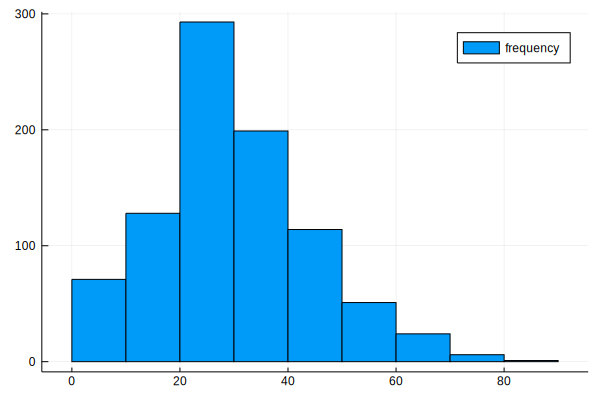

In [32]:
# Histogram
histogram(df.age, bins=10, labels = "frequency")

### Bar plot (one attribute) 

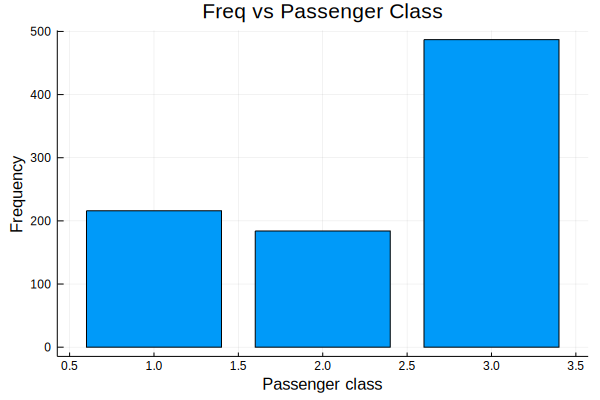

In [33]:
# Bar Plot
# bar(nrow(df_new), df_new.pclass,
# bar(by(df_new, :pclass, nrow, sort = true).x1,
bar(by(df, :pclass, nrow, sort = true).x1,  # x1 stores the frequency of each pclass.
    title = "Freq vs Passenger Class",
    xlabel = "Passenger class",
    ylabel = "Frequency",
    label = ""
)

### Box Plot 

Box plot can be plotted using two approaches. 

- One numeric attribute
- One numeric attribute + One categorical attribute

Here, the only attribute is `age` - a numeric attribute.

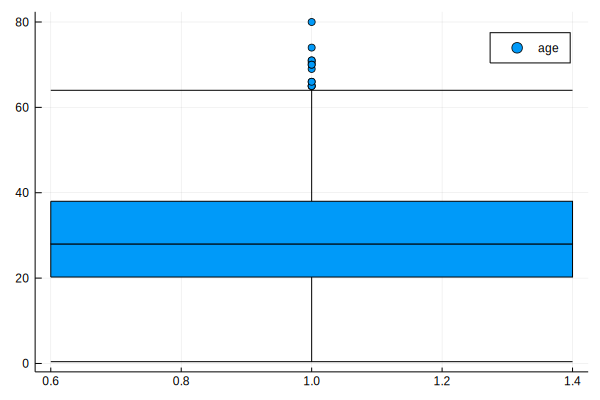

In [34]:
# Box Plot 1
boxplot(df.age, label = "age")

The boxplot involving one numeric attribute (`age` distribution) + one categorical attribute (group by `survived`) is shown.

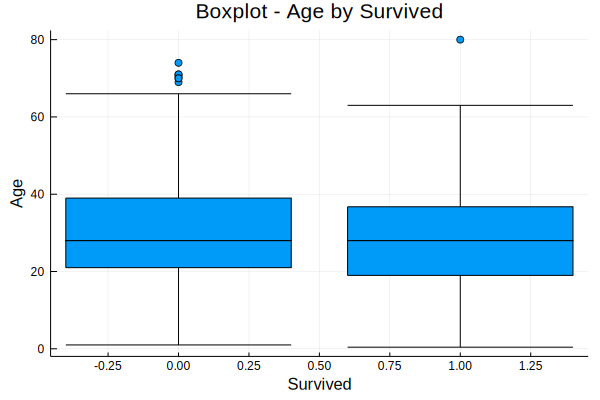

In [35]:
# Box Plot 2
# # Example given by the documentation.
# boxplot(repeat([1,2,3],outer=100),randn(1000))

boxplot(df.survived, df.age,
    title  = "Boxplot - Age by Survived",
    xlabel = "Survived",
    ylabel = "Age",
    label  = ""
)

### Scatter Plot (two numeric attributes) 

**Quantile (percentile)**

*Just FYI*,  the `quantile!()` function can be used for statistical analysis: mean, Q1, Q3, percentile, etc.

In [36]:
# Print age for each quantile.
[ println("Percentile: ", percentile*100, "% | ", quantile!(newdf.age, percentile))    
    for percentile in range(0, stop=1, length=11) ];

Percentile: 0.0% | 0.42
Percentile: 10.0% | 14.800000000000004
Percentile: 20.0% | 19.0
Percentile: 30.0% | 22.0
Percentile: 40.0% | 24.0
Percentile: 50.0% | 28.0
Percentile: 60.0% | 31.0
Percentile: 70.0% | 35.0
Percentile: 80.0% | 40.400000000000034
Percentile: 90.0% | 49.0
Percentile: 100.0% | 80.0


**Correlations**

In Julia, there is no an equivalent function to the Python Pandas library function `pandas.DataFrame.corr()`.

Therefore, the correlation must be calculated manually, using Statistics function `cor()`

In [37]:
# Rerun this code because some columns are converted 
# from Numeric to String types in earlier section.
colnumeric = []

for col in names(df)
    if eltype(df[!, col]) <: Number
        push!(colnumeric, col)
    end
end

colnumeric

6-element Array{Any,1}:
 :survived
 :pclass
 :age
 :siblingsspouses
 :parentschildren
 :fare

In [38]:
# Print Correlations for each rows and columns
println("Correlation")

len = length(colnumeric)

# Generate data frame
listattr1 = []
listattr2 = []
listcorr = []

for r in 1:len
    for c in r+1:len
        # Assign values & Calculation
        colr = colnumeric[r]
        colc = colnumeric[c]
        corr = cor(df[!, colr], df[!, colc])
        
        # Display correlation
        println("Attributes: ", colr, ", ", colc)
        println(">>> ", corr)
        println()
        
        # Generate data frame
        push!(listattr1, colr)
        push!(listattr2, colc)
        push!(listcorr, corr)
    end
end

Correlation
Attributes: survived, pclass
>>> -0.33652829994571254

Attributes: survived, age
>>> -0.05966512633024992

Attributes: survived, siblingsspouses
>>> -0.037082473392227505

Attributes: survived, parentschildren
>>> 0.08009652457892022

Attributes: survived, fare
>>> 0.25617854962896036

Attributes: pclass, age
>>> -0.39149161273824185

Attributes: pclass, siblingsspouses
>>> 0.08502641024038969

Attributes: pclass, parentschildren
>>> 0.02025152223536879

Attributes: pclass, fare
>>> -0.5489193554854472

Attributes: age, siblingsspouses
>>> -0.2976692313857059

Attributes: age, parentschildren
>>> -0.19374110105650588

Attributes: age, fare
>>> 0.11232863699941614

Attributes: siblingsspouses, parentschildren
>>> 0.414243940705179

Attributes: siblingsspouses, fare
>>> 0.15883935829132212

Attributes: parentschildren, fare
>>> 0.21547003157589073



Now we construct a data frame, storing the **correlation** values.

In [39]:
# Optional - Construct a data frame
dfcorr = DataFrame(Attr1 = listattr1, Attr2 = listattr2, corr = listcorr)

,Attr1,Attr2,corr
,Any,Any,Any
1,survived,pclass,-0.336528
2,survived,age,-0.0596651
3,survived,siblingsspouses,-0.0370825
4,survived,parentschildren,0.0800965
5,survived,fare,0.256179
6,pclass,age,-0.391492
7,pclass,siblingsspouses,0.0850264
8,pclass,parentschildren,0.0202515
9,pclass,fare,-0.548919


Another way of doing this, however, involves a much complicated process, and here is the demonstration.

First, generate a (n,n) matrix, where n is the number of numeric attributes from the data frame.

In [40]:
# Another way.
lengthcolnumeric = length(colnumeric)

matrixcorr = []

for r in 1:lengthcolnumeric
    listcorr = []
    
    for c in 1:len
        colr = colnumeric[r]
        colc = colnumeric[c]
        corr = cor(df[!, colr], df[!, colc])
        
        push!(listcorr, corr)
    end
    
    if matrixcorr == []
        matrixcorr = listcorr
    else
        matrixcorr = [matrixcorr listcorr]
    end
end

matrixcorr

6×6 Array{Any,2}:
  1.0        -0.336528   -0.0596651  -0.0370825   0.0800965   0.256179
 -0.336528    1.0        -0.391492    0.0850264   0.0202515  -0.548919
 -0.0596651  -0.391492    1.0        -0.297669   -0.193741    0.112329
 -0.0370825   0.0850264  -0.297669    1.0         0.414244    0.158839
  0.0800965   0.0202515  -0.193741    0.414244    1.0         0.21547
  0.256179   -0.548919    0.112329    0.158839    0.21547     1.0

Then we construct the data frame, this is inspired by Python's Pandas `corr()` function, but somehow there is no way to rename the row index.

In [41]:
# Generate list of column names
colname = []
for col in colnumeric
    if colname == []
        colname = [col]
    else
        colname = [colname; col]
    end
end

# Generate list of correlations
listcorrs = []

# # Method 1: Matrix without attribute name added to the first column
# for c in 1:size(matrixcorr, 2)
#     push!(listcorrs, matrixcorr[:,c])  
# end
# dfcorrgroup = DataFrame(listcorrs, colname)

# Method 2: Matrix with attribute name added to the first column
for c in 1:size(matrixcorr, 2)
    if listcorrs == []
        listcorrs = [colname matrixcorr[:,c]]
    else
        listcorrs = [listcorrs matrixcorr[:,c]]
    end
end
dfcorrgroup = DataFrame(listcorrs, [:Attrname; colname])
# show(dfcorrgroup, allcols=true)

,Attrname,survived,pclass,age,siblingsspouses,parentschildren
,Any,Any,Any,Any,Any,Any
1,survived,1.0,-0.336528,-0.0596651,-0.0370825,0.0800965
2,pclass,-0.336528,1.0,-0.391492,0.0850264,0.0202515
3,age,-0.0596651,-0.391492,1.0,-0.297669,-0.193741
4,siblingsspouses,-0.0370825,0.0850264,-0.297669,1.0,0.414244
5,parentschildren,0.0800965,0.0202515,-0.193741,0.414244,1.0
6,fare,0.256179,-0.548919,0.112329,0.158839,0.21547


### Scatter Plot

Then, we plot a scatter plot to inspect relationship between two continuous functions, as shown.

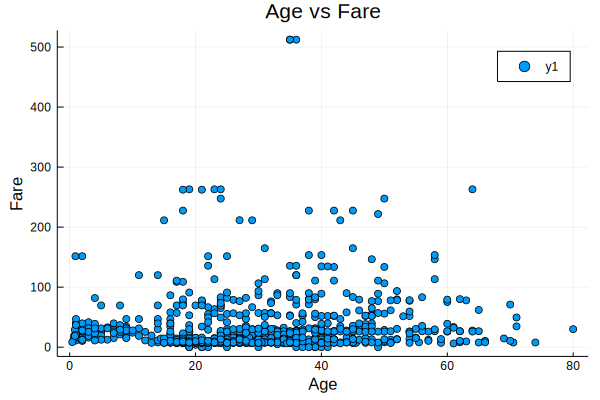

In [42]:
scatter(df.age, df.fare,
    title = "Age vs Fare",
    xlabel = "Age",
    ylabel = "Fare"
)

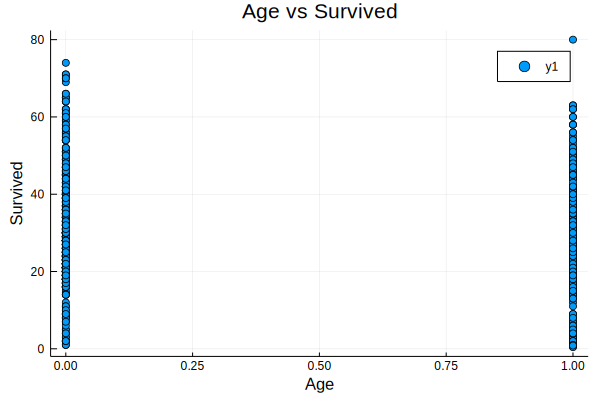

In [43]:
scatter(df.survived, df.age,
    title = "Age vs Survived",
    xlabel = "Age",
    ylabel = "Survived"
)

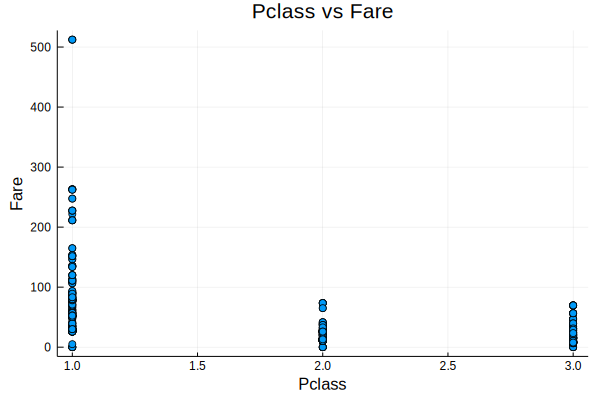

In [44]:
scatter(df.pclass, df.fare,
    title = "Pclass vs Fare",
    xlabel = "Pclass",
    ylabel = "Fare",
    label = ""
)